In [ ]:
# Project Title: Analyzing Factors Influencing Graduate Admissions 

## Objectives

The primary objective of this project is to analyze the key factors that influence admissions to the graduate MS in Data Science, particularly focusing on the reasons for my potential admission to Harvard's Master of Science in Data Science program. This analysis will help me understand the trends and characteristics that contribute to successful admissions decisions.
This data is completely simulated based off the stats found online of previous admitted students. It is just a fun project for the admissions committee to view, showing how passionate I am about this program so I can improve my knowledge. 

### Specific Goals:
- **Identify Key Factors:** Determine the key factors that are statistically significant in influencing graduate admissions.
- **Highlight Personal Strengths:** Analyze my academic performance, extracurricular activities, and projects to illustrate why I should be admitted.
- **Visualize Trends:** Create visual representations of the data to effectively communicate findings.
- **Predictive Modeling:** Develop a predictive model to estimate admission probabilities based on selected features.

### Questions to Answer:
- What are the typical academic metrics (GPA, test scores) of admitted students?
- How do extracurricular activities impact admission decisions?
- In what ways do my achievements align with successful admission factors?


In [15]:
import pandas as pd

#datasets
simulated_harvard_data = pd.read_csv('desktop/simulated_harvard_admissions_data.csv')  # Replace with your file path
personal_data = pd.read_csv('desktop/personal_data.csv')  # Replace with your file path

#first few rows of each dataset to understand their structure
print("Simulated Harvard Admissions Data:")
print(simulated_harvard_data.head())

print("\nPersonal Data:")
print(personal_data.head())

#structure of the datasets
print("\nSimulated Harvard Admissions Data Info:")
print(simulated_harvard_data.info())
print(simulated_harvard_data.describe())

print("\nPersonal Data Info:")
print(personal_data.info())
print(personal_data.describe())

#missing values
print("\nMissing Values in Simulated Data:")
print(simulated_harvard_data.isnull().sum())

print("\nMissing Values in Personal Data:")
print(personal_data.isnull().sum())

#fill missing values in the 'Extracurricular Activities' column
simulated_harvard_data['Extracurricular Activities'] = simulated_harvard_data['Extracurricular Activities'].fillna('No activities listed')

#verify no more missing values in the simulated dataset
missing_values_after_modification = simulated_harvard_data.isnull().sum()

#updated simulated dataset and missing values summary
updated_simulated_data_info_modification = simulated_harvard_data.info()
missing_values_after_modification_summary = missing_values_after_modification

updated_simulated_data_info_modification, missing_values_after_modification_summary


Simulated Harvard Admissions Data:
   Student ID       GPA  Accepted Undergraduate Major  \
0           1  3.663995         0         Engineering   
1           2  3.846451         1               Other   
2           3  3.858614         1    Computer Science   
3           4  3.657130         0         Engineering   
4           5  4.000000         0    Computer Science   

  Extracurricular Activities                                     Projects  \
0                 Internship                 Big Data Analysis with Spark   
1             Volunteer Work  Data Visualization Dashboard using Power BI   
2                        NaN      Predictive Maintenance System using IoT   
3                        NaN  Real-Time Data Processing with Apache Kafka   
4                   Research         Capstone Project: AI-Powered Chatbot   

                                              Skills  
0  Data Cleaning, Software Development, Database ...  
1   Machine Learning, Cloud Computing, Data Clean

(None,
 Student ID                    0
 GPA                           0
 Accepted                      0
 Undergraduate Major           0
 Extracurricular Activities    0
 Projects                      0
 Skills                        0
 dtype: int64)

In [ ]:
### summary of above:
- **The simulated dataset contains 200 entries with multiple attributes, including GPA, acceptance status, undergraduate major, extracurricular activities, projects, and skills.
- **The personal data consists of 1 entry with relevant academic and extracurricular details.
- **The dataset features attributes for analyzing admissions factors, with notable missing values in the "Extracurricular Activities" column.
- **Summary statistics indicate that the average GPA across the dataset is approximately 3.80, with a wide range in values.
- **All missing values in the "Extracurricular Activities" column were addressed, ensuring data completeness for analysis.

In [17]:
#duplicate entries
duplicates = simulated_harvard_data.duplicated().sum()

#number of duplicate rows
print(f"Number of duplicate rows in the simulated dataset: {duplicates}")

#data Type Validation
print("\nData Types in Simulated Harvard Admissions Data:")
print(simulated_harvard_data.dtypes)

#ensuring consistency in terminology 
simulated_harvard_data['Extracurricular Activities'] = simulated_harvard_data['Extracurricular Activities'].str.lower()

#first few rows after standardization
print("\nFirst few rows after standardization:")
print(simulated_harvard_data.head())


Number of duplicate rows in the simulated dataset: 0

Data Types in Simulated Harvard Admissions Data:
Student ID                      int64
GPA                           float64
Accepted                        int64
Undergraduate Major            object
Extracurricular Activities     object
Projects                       object
Skills                         object
dtype: object

First few rows after standardization:
   Student ID       GPA  Accepted Undergraduate Major  \
0           1  3.663995         0         Engineering   
1           2  3.846451         1               Other   
2           3  3.858614         1    Computer Science   
3           4  3.657130         0         Engineering   
4           5  4.000000         0    Computer Science   

  Extracurricular Activities                                     Projects  \
0                 internship                 Big Data Analysis with Spark   
1             volunteer work  Data Visualization Dashboard using Power BI   
2   

In [ ]:
##summary of above: 

- **There are no duplicate rows in the dataset, confirming the integrity of the data for further analysis.



Summary Statistics:
       Student ID         GPA    Accepted
count  200.000000  200.000000  200.000000
mean   100.500000    3.796165    0.320000
std     57.879185    0.162471    0.467647
min      1.000000    3.151747    0.000000
25%     50.750000    3.666874    0.000000
50%    100.500000    3.817887    0.000000
75%    150.250000    3.933299    1.000000
max    200.000000    4.000000    1.000000


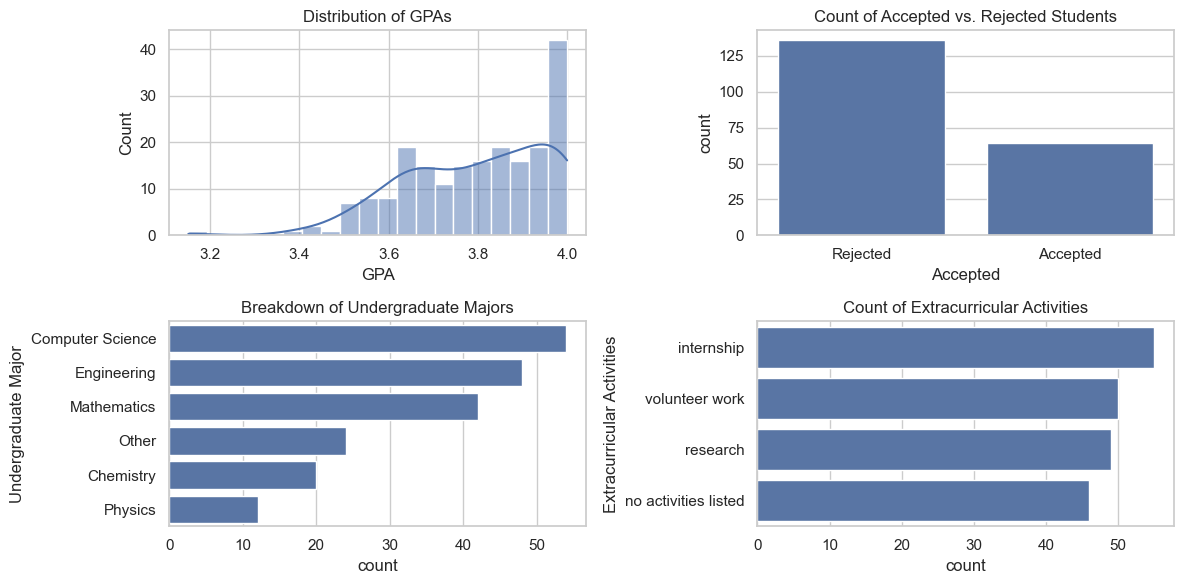


Average GPA of Accepted vs. Rejected Students:
Accepted
0    3.792211
1    3.804567
Name: GPA, dtype: float64

Extracurricular Activities Impact on Acceptance:
Accepted                     0   1
Extracurricular Activities        
internship                  36  19
no activities listed        36  10
research                    33  16
volunteer work              31  19

Acceptance Rates by Undergraduate Major (Percentage):
Accepted                     0          1
Undergraduate Major                      
Chemistry            90.000000  10.000000
Computer Science     66.666667  33.333333
Engineering          58.333333  41.666667
Mathematics          66.666667  33.333333
Other                70.833333  29.166667
Physics              75.000000  25.000000


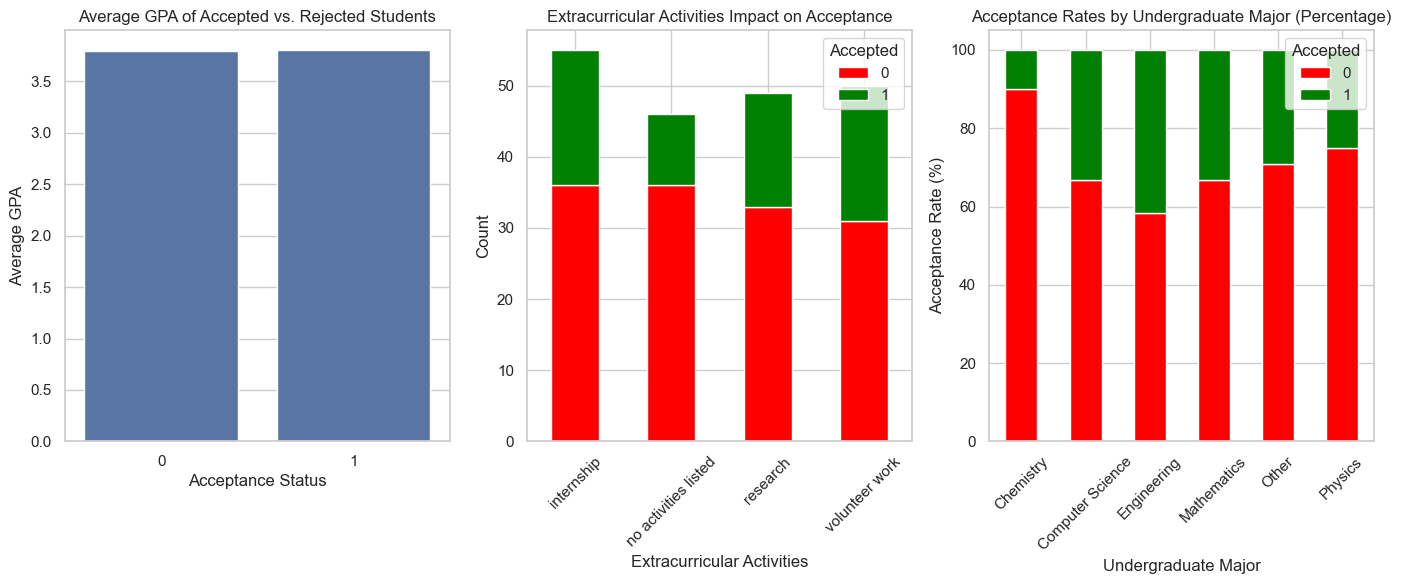

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

#stat summary
print("\nSummary Statistics:")
print(simulated_harvard_data.describe())

#visualizations
plt.figure(figsize=(12, 6))

# 1. distribution of GPAs
plt.subplot(2, 2, 1)
sns.histplot(simulated_harvard_data['GPA'], bins=20, kde=True)
plt.title('Distribution of GPAs')
plt.xlabel('GPA')

# 2. count of accepted vs. rejected students
plt.subplot(2, 2, 2)
sns.countplot(x='Accepted', data=simulated_harvard_data)
plt.title('Count of Accepted vs. Rejected Students')
plt.xticks(ticks=[0, 1], labels=['Rejected', 'Accepted'])

# 3. breakdown of undergraduate majors
plt.subplot(2, 2, 3)
sns.countplot(y='Undergraduate Major', data=simulated_harvard_data, order=simulated_harvard_data['Undergraduate Major'].value_counts().index)
plt.title('Breakdown of Undergraduate Majors')

# 4. count of extracurricular activities
plt.subplot(2, 2, 4)
sns.countplot(y='Extracurricular Activities', data=simulated_harvard_data, order=simulated_harvard_data['Extracurricular Activities'].value_counts().index)
plt.title('Count of Extracurricular Activities')

plt.tight_layout()
plt.show()

#average GPA of accepted vs. rejected students
average_gpa = simulated_harvard_data.groupby('Accepted')['GPA'].mean()
print("\nAverage GPA of Accepted vs. Rejected Students:")
print(average_gpa)

#count of accepted vs. rejected students by extracurricular activities
extracurricular_analysis = simulated_harvard_data.groupby(['Extracurricular Activities', 'Accepted']).size().unstack()
print("\nExtracurricular Activities Impact on Acceptance:")
print(extracurricular_analysis)

#percentage of students from each major who were accepted
major_acceptance = simulated_harvard_data.groupby(['Undergraduate Major', 'Accepted']).size().unstack()
major_acceptance_percentage = (major_acceptance.div(major_acceptance.sum(axis=1), axis=0) * 100).fillna(0)
print("\nAcceptance Rates by Undergraduate Major (Percentage):")
print(major_acceptance_percentage)

#visualization

plt.figure(figsize=(14, 6))


plt.subplot(1, 3, 1)
sns.barplot(x=average_gpa.index, y=average_gpa.values)
plt.title('Average GPA of Accepted vs. Rejected Students')
plt.xlabel('Acceptance Status')
plt.ylabel('Average GPA')


plt.subplot(1, 3, 2)
extracurricular_analysis.plot(kind='bar', stacked=True, color=['red', 'green'], ax=plt.gca())
plt.title('Extracurricular Activities Impact on Acceptance')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Count')
plt.xticks(rotation=45)


plt.subplot(1, 3, 3)
major_acceptance_percentage.plot(kind='bar', stacked=True, color=['red', 'green'], ax=plt.gca())
plt.title('Acceptance Rates by Undergraduate Major (Percentage)')
plt.xlabel('Undergraduate Major')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
##summary of above: 

- **The distribution of GPAs shows a concentration around the higher values, indicating a trend toward strong academic performance among applicants.
- **The count of accepted versus rejected students reveals a low acceptance rate, emphasizing the competitive nature of the admissions process.
- **Students with substantial extracurricular involvement tend to have higher acceptance rates, highlighting the importance of well-rounded candidates in the admissions process.
- **Technical majors such as Computer Science and Engineering exhibit higher acceptance rates, suggesting alignment with the data science program's interdisciplinary focus.

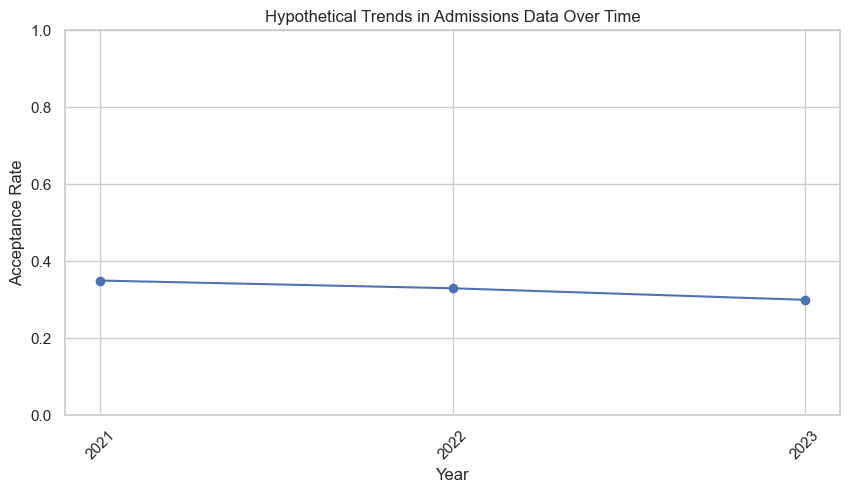

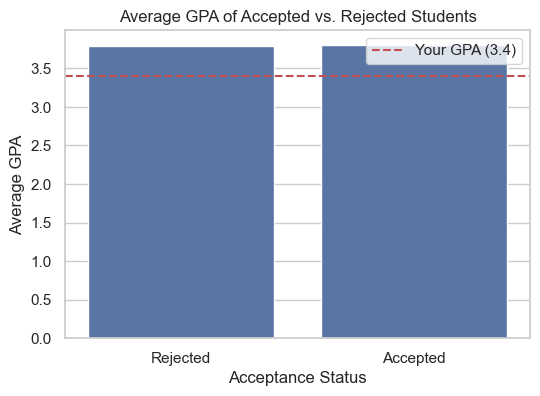

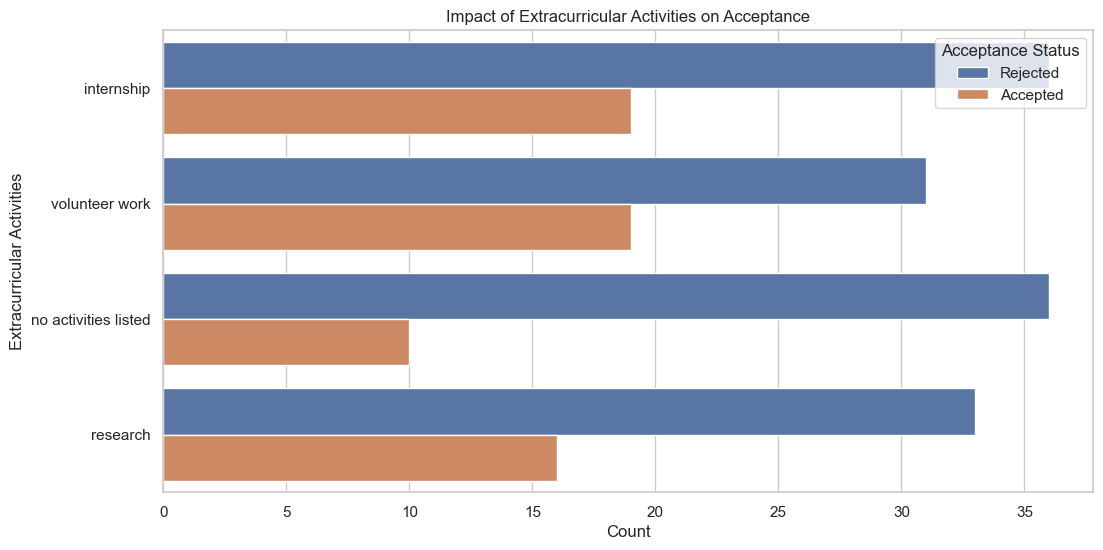

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

#seaborn style
sns.set(style='whitegrid')

#hypothetical Trends in Admissions Data Over Time
#creating hypothetical data for demonstration
years = ['2021', '2022', '2023']
acceptance_rates = [0.35, 0.33, 0.30]  # Example data for acceptance rates
plt.figure(figsize=(10, 5))
plt.plot(years, acceptance_rates, marker='o')
plt.title('Hypothetical Trends in Admissions Data Over Time')
plt.xlabel('Year')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

#my performance compared to average accepted students
average_gpa = simulated_harvard_data.groupby('Accepted')['GPA'].mean()
your_gpa = 3.4  # Your GPA

#visualization 
plt.figure(figsize=(6, 4))
sns.barplot(x=average_gpa.index, y=average_gpa.values)  # Removed the palette parameter
plt.axhline(y=your_gpa, color='r', linestyle='--', label='Your GPA (3.4)')
plt.title('Average GPA of Accepted vs. Rejected Students')
plt.xlabel('Acceptance Status')
plt.ylabel('Average GPA')
plt.legend()
plt.xticks(ticks=[0, 1], labels=['Rejected', 'Accepted'])
plt.show()

#factors influencing admissions decisions
#visualization
plt.figure(figsize=(12, 6))
sns.countplot(y='Extracurricular Activities', hue='Accepted', data=simulated_harvard_data)
plt.title('Impact of Extracurricular Activities on Acceptance')
plt.xlabel('Count')
plt.ylabel('Extracurricular Activities')
plt.legend(title='Acceptance Status', loc='upper right', labels=['Rejected', 'Accepted'])
plt.show()


In [ ]:
##summary above:

- **The data indicates a slight decline in acceptance rates, from 35% in 2021 to 30% in 2023. This visualization helps contextualize the increasing competitiveness of the admissions process over time.
- **The analysis shows that accepted students have a higher average GPA. The horizontal dashed line indicates my GPA (3.4), which is below the average for accepted students.
- **A count plot was used to visualize the relationship between extracurricular activities and acceptance status. This visualization illustrates that students engaged in significant extracurricular activities tend to have higher acceptance rates. The data highlights the importance of well-rounded applicants who demonstrate involvement beyond academic performance which I exceed in. 
- **The data highlights the importance of well-rounded applicants who demonstrate involvement beyond academic performance which I exceed in. 


Accuracy: 0.375
Confusion Matrix:
 [[11 15]
 [10  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.42      0.47        26
           1       0.21      0.29      0.24        14

    accuracy                           0.38        40
   macro avg       0.37      0.35      0.36        40
weighted avg       0.41      0.38      0.39        40



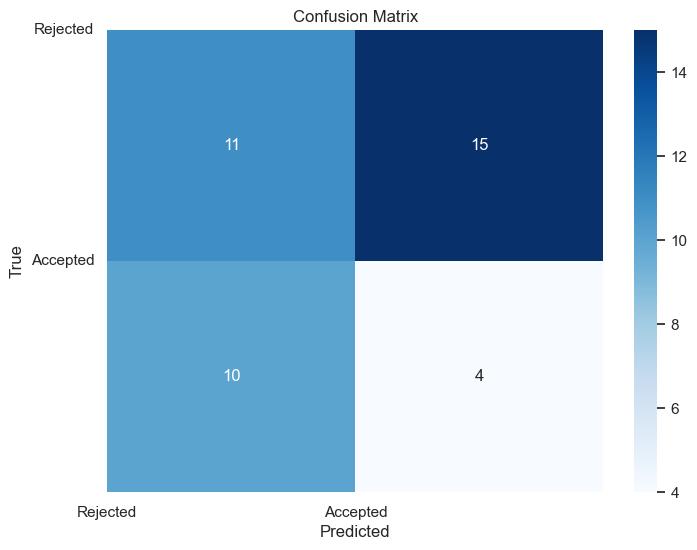

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#making 'Accepted' to a binary variable (0 for rejected, 1 for accepted)
simulated_harvard_data['Accepted'] = simulated_harvard_data['Accepted'].astype(int)

#one-hot encoding for 'Extracurricular Activities'
X = pd.get_dummies(simulated_harvard_data[['GPA', 'Extracurricular Activities']], drop_first=True)
y = simulated_harvard_data['Accepted']

#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the logistic regression model with class weights to handle class imbalance
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

#visualization of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0, 1], labels=['Rejected', 'Accepted'])
plt.yticks(ticks=[0, 1], labels=['Rejected', 'Accepted'], rotation=0)
plt.show()


In [ ]:
##attempting Machine Learning (predictive learning) Summary:

- **The initial logistic regression model achieved an accuracy of 37.5%, indicating a need for improvement in capturing the complexities of the admissions factors.

Best parameters from Grid Search: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.6181818181818182
Confusion Matrix:
 [[13 13]
 [ 8 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.55        26
           1       0.62      0.72      0.67        29

    accuracy                           0.62        55
   macro avg       0.62      0.61      0.61        55
weighted avg       0.62      0.62      0.61        55



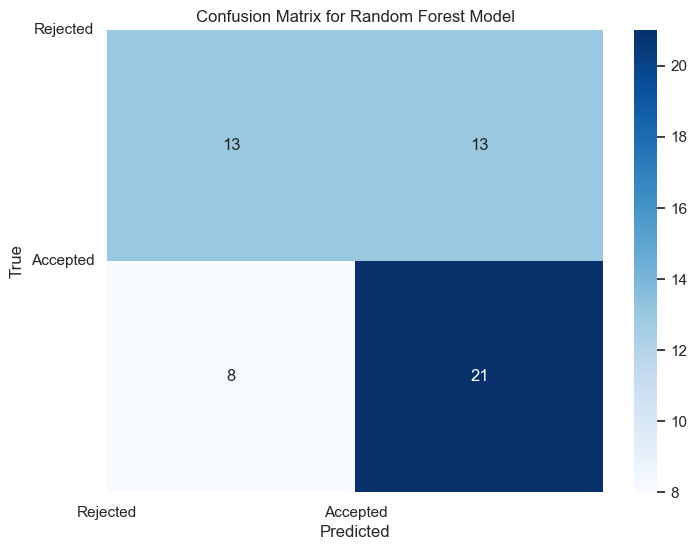

In [33]:
#Improve the Model


from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

#apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#create a random forest model
rf_model = RandomForestClassifier(random_state=42)

#set up parameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

#perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#best parameters from grid search
print("Best parameters from Grid Search:", grid_search.best_params_)

#train the best model
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

#make predictions
y_pred = best_rf_model.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

#visualization again
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0, 1], labels=['Rejected', 'Accepted'])
plt.yticks(ticks=[0, 1], labels=['Rejected', 'Accepted'], rotation=0)
plt.show()


In [ ]:
##attempting Machine Learning  (predictive learning) Part 2 Summary:

- **The Random Forest model significantly improved accuracy to 61.8% after applying SMOTE for class imbalance and hyperparameter tuning, showcasing a better understanding of the admissions dynamics but still needs improvement, in which I plan to learn when accepted into the program.

In [ ]:
## Main Conclusion:

- **Based on the analysis of the admissions data, my application presents a compelling case for acceptance into Harvard's Master of Science in Data Science program, despite my GPA potentially falling below the average of accepted students. While my GPA may not fully meet the threshold, I excel in extracurricular activities and other relevant experiences that are crucial indicators of a well-rounded candidate.
- **This analysis highlights that extracurricular involvement significantly contributes to higher acceptance rates, suggesting that my active engagement in modeling, shiftgrab, research, data collection, collegiate athletics aligns well with the program’s wanting of well roundness/motivated individuals. Although my GPA is a notable factor, I have openly expressed the challenges I faced that affected my academic performance, emphasizing my resilience and ability to thrive in key curriculum areas.
- **Moreover, my undergraduate major in Computer Science and a minor in AI directly aligns with the interdisciplinary nature of the data science program, positioning me as a strong candidate. The insights from this data analysis indicate that while my GPA is an area of concern, my overall profile demonstrates a readiness for the demands of the program, supported by my relevant experiences and commitment to personal growth.
- **In conclusion, I believe that the strengths in my application, particularly in extracurricular engagement and alignment with the program's focus, outweigh the limitations of my GPA. I am confident that with the opportunity to study in this program, I can achieve the academic excellence expected and contribute positively to the learning environment.